In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import cosine_similarity

In [63]:
DATA_DIR = 'data/dataset.csv'

In [59]:
def boxplot(times):
    N = len(times)
    fig, axes = plt.subplots(1, N, figsize=(15, 5), sharey=True)
    for k in range(N):
        axes[k].boxplot(times[k].all_runs)
        axes[k].set_title("K = " + str((k+1)*10))
        axes[k].grid(True)
    plt.tight_layout()
    plt.show()        

In [40]:
def scatter(data):
    plt.scatter(data.source, data.target, s=data.rating*100, c=data.rating, alpha=.5)
    plt.colorbar(ticks=[-10, 0, 10])
    plt.grid(True)
    plt.show()

## k-means clustering

Given a set of observations $(x_1, x_2, ..., x_n)$, where each observation is a $d$-dimensional real vector, $k$-means clustering aims to partition the $n$ observations into $k$ ($\leq n$) sets $S = {S_1, S_2, …, S_k}$ so as to minimize the within-cluster sum of squares (WCSS) (i.e. variance). Formally, the objective is to find:

\begin{equation}
{\underset {\mathbf {S} }{\operatorname {arg\,min} }}\sum _{i=1}^{k}\sum _{\mathbf {x} \in S_{i}}\left\|\mathbf {x} -{\boldsymbol {\mu }}_{i}\right\|^{2}={\underset {\mathbf {S} }{\operatorname {arg\,min} }}\sum _{i=1}^{k}|S_{i}|\operatorname {Var} S_{i}
\end{equation}

In [26]:
#data = np.genfromtxt('data/dataset.csv', delimiter=',')
data = pd.read_csv(DATA_DIR, header=None, names=['source', 'target', 'rating'])

In [27]:
data.describe()

,source,target,rating
count,24186.000000,24186.000000,24186.000000
mean,864.029314,1051.093815,1.463946
std,1592.085638,1871.765504,2.903656
min,1.000000,1.000000,-10.000000
25%,58.000000,66.000000,1.000000
50%,238.000000,279.000000,1.000000
75%,898.000000,1068.000000,2.000000
max,7604.000000,7604.000000,10.000000


In [30]:
data_12 = data[data.target > np.max(data.target) / 2]

In [32]:
data_12.describe()

,source,target,rating
count,1632.000000,1632.000000,1632.000000
mean,1129.602941,7390.294118,-3.141544
std,2136.001796,527.135146,5.879972
min,1.000000,4017.000000,-10.000000
25%,43.000000,7419.000000,-10.000000
50%,191.000000,7550.500000,-1.000000
75%,876.500000,7588.000000,1.000000
max,7604.000000,7604.000000,10.000000


In [9]:
sim = cosine_similarity(fil)

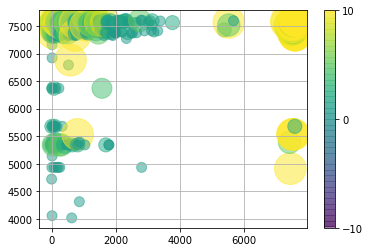

In [41]:
scatter(data_12)

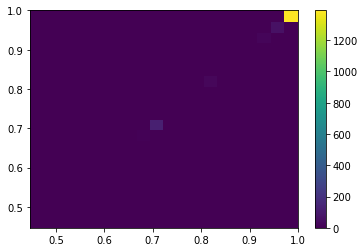

In [47]:
plt.hist2d(sim[:,0], sim[:,1], bins=[20,20])
plt.colorbar()
plt.show()

In [67]:
K = list(range(10, 51, 10))
times = list()

In [69]:
for k in K:
    time = %timeit -r 5 -n 1 -o -q !bash run.sh $DATA_DIR $k .1 2>/dev/null
    times.append(time)

Iterations: 83
Iterations: 83
Iterations: 83
Iterations: 83
Iterations: 83
Iterations: 136
Iterations: 136
Iterations: 136
Iterations: 136
Iterations: 136
Iterations: 187
Iterations: 187
Iterations: 187
Iterations: 187
Iterations: 187
Iterations: 183
Iterations: 183
Iterations: 183
Iterations: 183
Iterations: 183
Iterations: 291
Iterations: 291
Iterations: 291
Iterations: 291
Iterations: 291


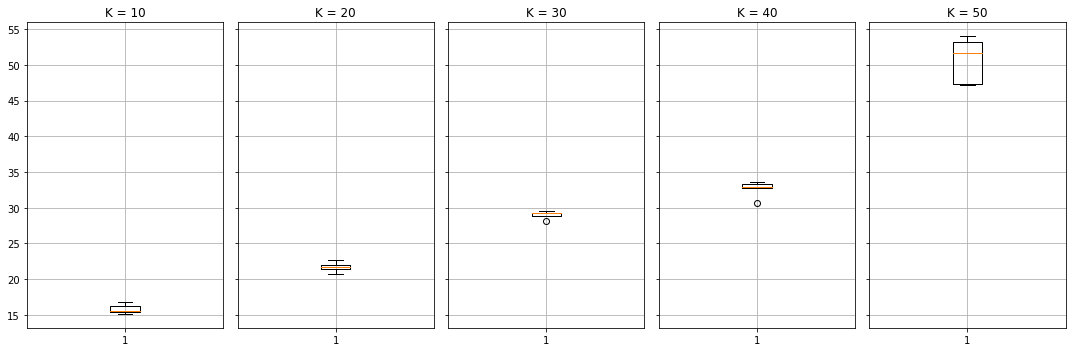

In [70]:
boxplot(times)